# DeepPetClassifier

**Target:** To build a model that can recognize cats using Artificial Neural Networks.


**About the model:** We use a model here known as `resnet34`, trained using about `1.3` million images.

**Dataset:** Oxford-IIIT Pet Dataset (dataset consisting of `7349` pictures of cats and dogs)

## Library installation
We need:

`fastai==2.5.3` version or above

`torch==1.10.0+cu111` version or above



---

**❗Make sure you turned on GPU**

In [ ]:
# import torch
# torch.cuda.is_available()

True

In [ ]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

2.7.12
2.0.1+cu118


## Model building

In [ ]:
# libraries
from fastai.vision.all import *
from ipywidgets import widgets

# data
path = untar_data(URLs.PETS)/"images"

# labeling function
def is_cat(x): return x[0].isupper()

# dataloaders
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# training
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.175330,0.018775,0.995264,00:59


epoch,train_loss,valid_loss,accuracy,time
0,0.042748,0.026076,0.993234,00:54
1,0.034654,0.005287,0.998647,00:52


## Model performance checking

In [14]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is cat? : True
Probability : 100.0%



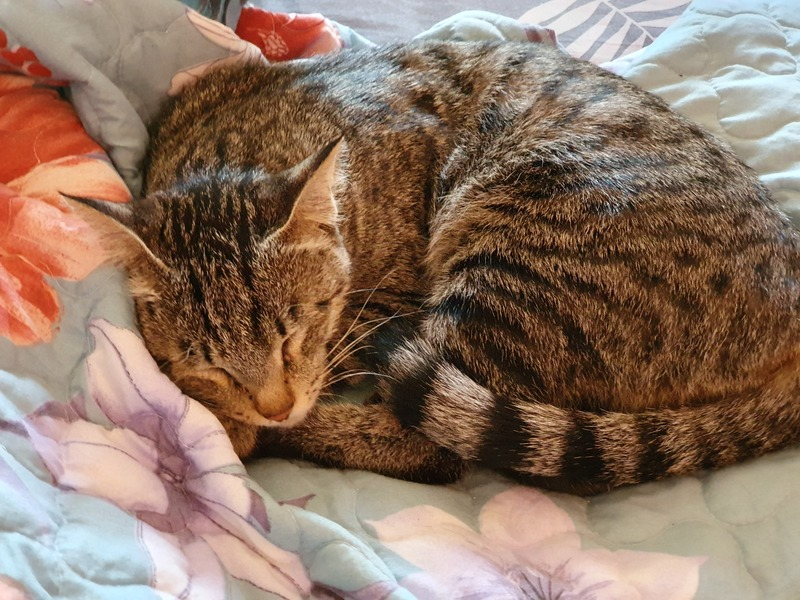

In [18]:
img = PILImage.create(upload.data[-1])
pred, _, prob = learn.predict(img)

print(f"Is cat? : {pred}")
print(f"Probability : {prob[1].item()*100:.1f}%\n")
img

## Conclusion

the `"DeepPetClassifier"` project is dedicated to the development of an **Artificial Neural Network model**, specifically utilizing the robust `"resnet34"` architecture. The project's primary objective is the accurate **recognition of cats** within a dataset sourced from the `Oxford-IIIT Pet Dataset`, encompassing a substantial collection of `7349` images of both cats and dogs.

Through the application of deep learning techniques, this project seeks to achieve precise and reliable cat recognition, demonstrating the potential of neural networks in solving real-world image classification challenges.

P.s.: The cat in the model performance checking section is my cat🙃